<a href="https://colab.research.google.com/github/SSalmanE9/salman/blob/main/advance_ai_noise_detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#GENAI PIONEER COMPUTER VISION LEVEL 1 COURSE

In [ ]:
 #Cell 1 — Install & Setup (Clean numpy-safe versions)
!pip install numpy==1.23.5
!pip install opencv-python
!pip install matplotlib

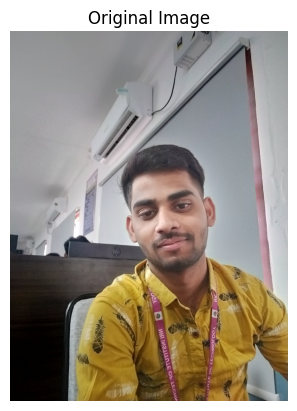

In [ ]:
#Cell 2 — Image Read, Write & Display
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read Image
img = cv2.imread('sample.jpg')  # Upload sample image in Colab

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load the image. Make sure 'sample.jpg' is uploaded.")
else:
    # Convert BGR to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Save the image after resize
    resized = cv2.resize(img, (400, 400))
    cv2.imwrite('resized_sample.jpg', resized)

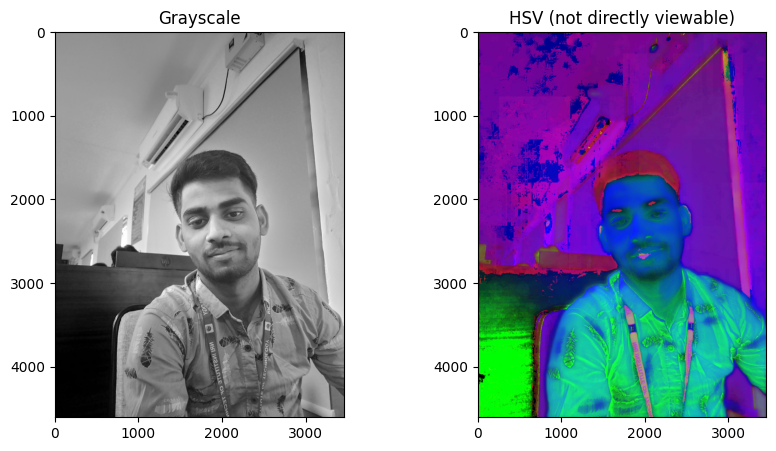

In [ ]:
#Cell 3 — Color Space Conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")

plt.subplot(1,2,2)
plt.imshow(hsv)
plt.title("HSV (not directly viewable)")

plt.show()

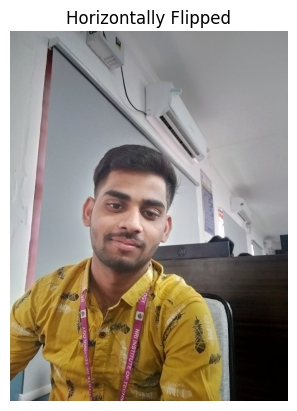

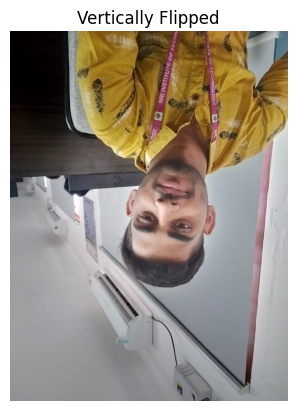

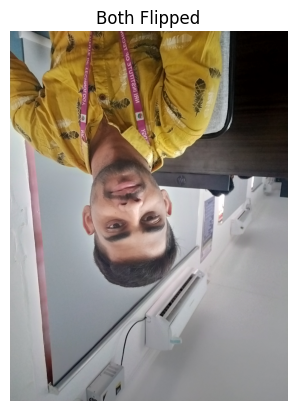

In [ ]:
#Cell 4 — Image Flipping, Cropping & Rotation
# Flip Horizontal
flip_h = cv2.flip(img, 1)

# Flip Vertical
flip_v = cv2.flip(img, 0)

# Rotate 90 Degrees
rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(cv2.cvtColor(flip_h, cv2.COLOR_BGR2RGB))
plt.title("Horizontally Flipped")
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(flip_v, cv2.COLOR_BGR2RGB))
plt.title("Vertically Flipped")
plt.axis('off')
plt.show()

# Flip Vertical
flip_b = cv2.flip(img, -1)
plt.imshow(cv2.cvtColor(flip_b, cv2.COLOR_BGR2RGB))
plt.title("Both Flipped")
plt.axis('off')
plt.show()


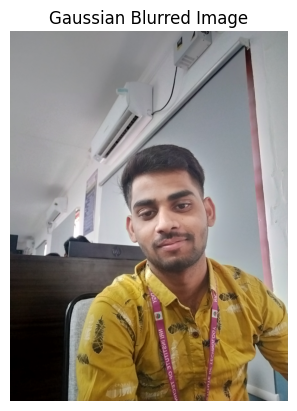

In [ ]:
#Cell 5 — Image Filtering
# Gaussian Blur
blurred = cv2.GaussianBlur(img, (9, 9), 0)

plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurred Image")
plt.axis('off')
plt.show()


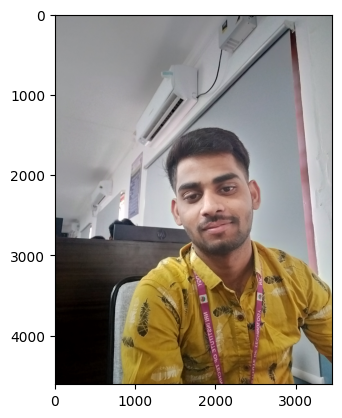

In [ ]:
#ImageCropping
img_NZ_bgr = cv2.imread("sample.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

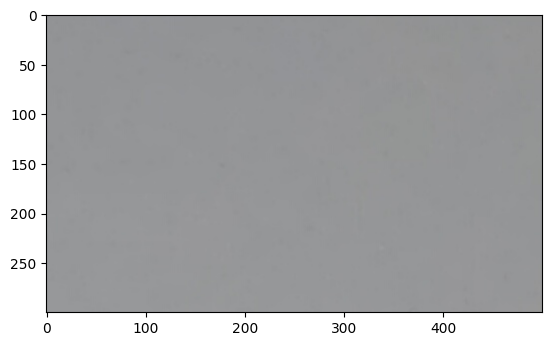

In [ ]:
#Crop out the middle region of the image
cropped_region = img_NZ_rgb[100:400, 100:600]
plt.imshow(cropped_region)

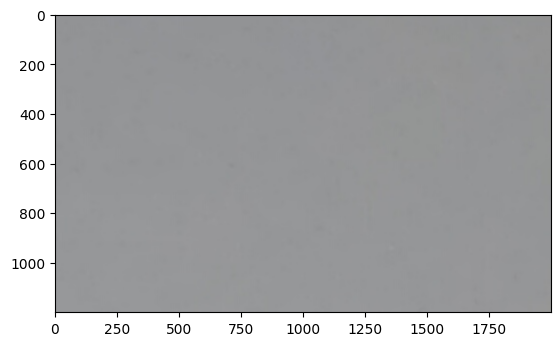

In [ ]:
#Resizing Images
#The function resize resizes the image src down to or up to the specified size. The size and type are derived from the src,dsize,fx, and fy.
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=4, fy=4)
plt.imshow(resized_cropped_region_2x)

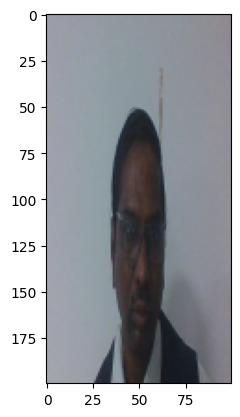

In [ ]:
#Method 2: Specifying exact size of the output image
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Saving 1000175755.jpg to 1000175755.jpg


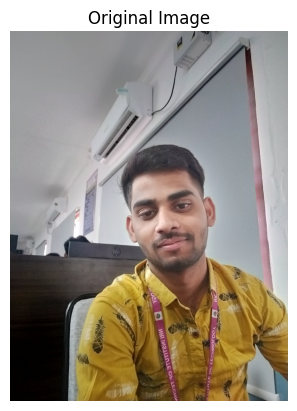

In [2]:
from google.colab import files
uploaded = files.upload()

import io
from PIL import Image

image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

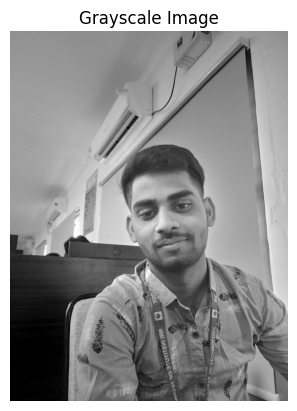

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

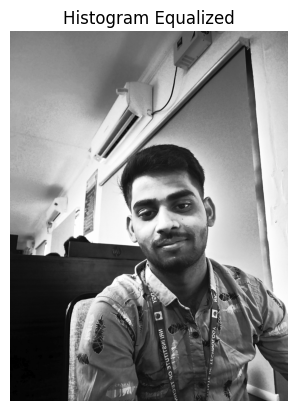

In [4]:
hist_eq = cv2.equalizeHist(gray)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")
plt.show()

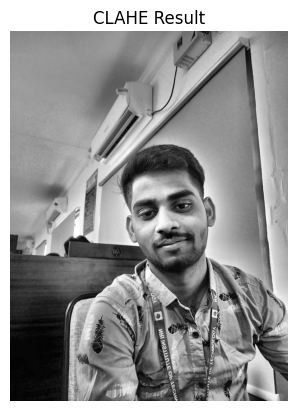

In [5]:
#Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_eq = clahe.apply(gray)
plt.imshow(clahe_eq, cmap='gray')
plt.title("CLAHE Result")
plt.axis("off")
plt.show()

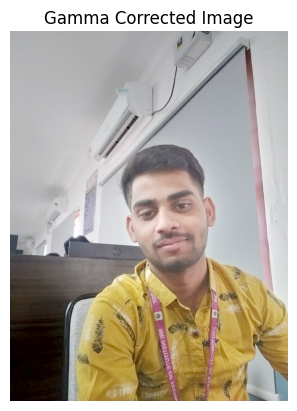

In [6]:
#Gamma Correction
gamma = 1.5
invGamma = 1.0 / gamma
table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
gamma_corrected = cv2.LUT(img, table)

plt.imshow(gamma_corrected)
plt.title("Gamma Corrected Image")
plt.axis("off")
plt.show()

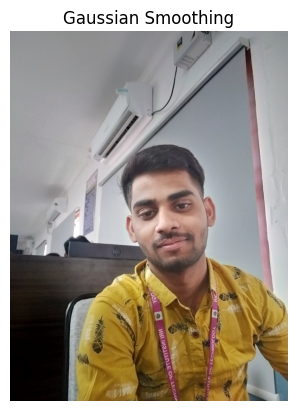

In [7]:
gaussian = cv2.GaussianBlur(img, (7, 7), 0)
plt.imshow(gaussian)
plt.title("Gaussian Smoothing")
plt.axis("off")
plt.show()

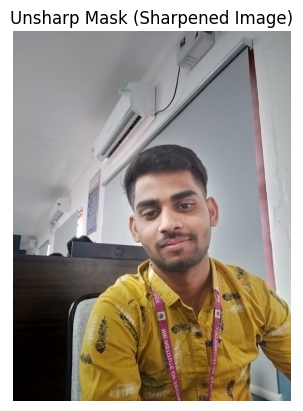

In [8]:
gaussian_blur = cv2.GaussianBlur(img, (9, 9), 10.0)
unsharp_image = cv2.addWeighted(img, 1.5, gaussian_blur, -0.5, 0)

plt.imshow(unsharp_image)
plt.title("Unsharp Mask (Sharpened Image)")
plt.axis("off")
plt.show()